# Módulo 9: Árboles de decisión 
## Clasificación multiclase con árboles de decisión

Para realizar este ejercicio vamos a utilizar el dataset **wine** que se encuentra en la librería **Scikit-Learn**. El mismo consta de **13 parámetros distintos del vino**, como el contenido de alcohol, medidos en **178 muestras**.

Estos vinos fueron cultivados en la misma región de Italia, pero provienen de **tres cultivares diferentes**; por lo tanto, el dataset contiene **tres clases distintas de vino**.

El objetivo es encontrar un modelo que pueda **predecir la clase del vino a partir de los 13 parámetros observados**. Para ello, vamos a crear y comparar varios modelos de clasificación: **Regresión Logística** y **K-NN**, evaluando la precisión de cada uno.

Los **features** del dataset son:

    1) Alcohol
    2) Malic acid
    3) Ash
    4) Alcalinity of ash
    5) Magnesium
    6) Total phenols
    7) Flavanoids
    8) Nonflavanoid phenols
    9) Proanthocyanins
    10) Color intensity
    11) Hue
    12) OD280/OD315 of diluted wines
    13) Proline       

El label esta representado por los valores 1, 2 y 3 para identificar cada tipo de vino.

Antes de comenzar con la implementación, vamos a organizar la actividad en una serie de pasos para facilitar su desarrollo y análisis. A continuación se detallan las etapas que seguiremos:

1. Importación de las librerías necesarias
2. División del dataset
3. Entrenamiento de modelos de clasificación
4. Evaluación y comparación del desempeño
5. Análisis de resultados

### Importación de las librerías necesarias
### <font color='red'>**Actividad 1:**</font>

**a)** Importar las librerías necesarias para realizar el ejercicio (ir incluyendo en esta celda las librerías y módulos que se vayan necesitando a lo largo de **toda** la actividad)

In [22]:
import seaborn as sns              # Librería de visualización más avanzada (basada en Matplotlib)
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine          
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier        
from sklearn.ensemble import RandomForestClassifier    
from sklearn.ensemble import GradientBoostingClassifier 

### División del dataset

### <font color='red'>**Actividad 2:**</font>

**a)** Cargar el dataset (wine dataset) de la libreria [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) y almacenar en la variable **X** los features y en la variable **y** los labels

In [5]:
data = load_wine()
# X contiene los features (13 columnas con características químicas del vino)
X = data.data
# y contiene las etiquetas (clases del vino: 0, 1 o 2)
y = data.target

**b)** Dividir el dataset en **dataset de entrenamiento y testeo con un tamaño de testeo del 20%. Utilizar las variables X_train, X_test, y_train, y_test** para almacenar los datasets y los labels correspondientes.

In [7]:
# Datos en entrenamiento (80%) y testeo (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) #random_state fija la semilla aleatoria para obtener los mismos resultados cada vez que se corra el código.

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (142, 13)
Tamaño de X_test: (36, 13)
Tamaño de y_train: (142,)
Tamaño de y_test: (36,)


### Entrenamiento de modelos de clasificación

### <font color='red'>**Actividad 3:**</font>

**a)** Crear y entrenar al menos tres modelos de árboles de decisión diferentes: un **árbol de decisión con criterio de división Gini**, un **árbol de decisión con poda**, y un **árbol de decisión con criterio de división Entropía**.

**Nota:** Para realizar la poda en el árbol se debe setear el parámetro **ccp_alpha** con un valor entre 0 y 0.1 (se pueden probar distintos valores).


In [24]:
# Árbol de decisión con criterio Gini
arbol_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
# Entrenamos el modelo con los datos de entrenamiento
arbol_gini.fit(X_train, y_train)


# Árbol de decisión con poda
arbol_podado = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.01, random_state=42) 
#ccp_alpha= cost-complexity Pruning. Controla la intensidad de la poda
# Entrenamos el modelo podado
arbol_podado.fit(X_train, y_train)

# Árbol de decisión con criterio Entropía
arbol_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
# Entrenamos el modelo
arbol_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)


**b)** Crear y entrenar al menos dos modelos de ensamblado con **100 árboles** cada uno: un **Random Forest** y un **Gradient Boosting**.

In [9]:
# Random Forest con 100 árboles
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenamos el modelo
modelo_rf.fit(X_train, y_train)

# Gradient Boosting con 100 árboles
modelo_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Entrenamos el modelo
modelo_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluación y comparación del desempeño

### <font color='red'>**Actividad 4:**</font>

**a)** Crear las **predicciones** para todos los modelos creados, utilizando el **dataset de testeo**.

In [10]:
# Predicciones para cada modelo
y_pred_gini = arbol_gini.predict(X_test)
y_pred_podado = arbol_podado.predict(X_test)
y_pred_entropy = arbol_entropy.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)
y_pred_gb = modelo_gb.predict(X_test)


**b)** Utilizar la función **accuracy_score** para obtener la **precisión** de los modelos creados e **imprimir los resultados**.

In [12]:
# Cálculo de precisión de cada modelo
acc_gini = accuracy_score(y_test, y_pred_gini)
acc_podado = accuracy_score(y_test, y_pred_podado)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)

print("=== Precisión de cada modelo ===")
print(f"Árbol Gini:        {acc_gini:.3f}")
print(f"Árbol Podado:      {acc_podado:.3f}")
print(f"Árbol Entropía:    {acc_entropy:.3f}")
print(f"Random Forest:     {acc_rf:.3f}")
print(f"Gradient Boosting: {acc_gb:.3f}")

=== Precisión de cada modelo ===
Árbol Gini:        0.944
Árbol Podado:      0.944
Árbol Entropía:    0.917
Random Forest:     1.000
Gradient Boosting: 0.944


**c)** Utilizar la función **classification_report** para obtener un **reporte de la clasificación** realizada por cada uno de los modelos e **imprimirlo**.

In [13]:
print("=== Reporte Árbol Gini ===")
print(classification_report(y_test, y_pred_gini))

print("=== Reporte Árbol Podado ===")
print(classification_report(y_test, y_pred_podado))

print("=== Reporte Árbol Entropía ===")
print(classification_report(y_test, y_pred_entropy))

print("=== Reporte Random Forest ===")
print(classification_report(y_test, y_pred_rf))

print("=== Reporte Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb))


#classification_report muestra las siguientes métricas:
#-precision: porcentaje de verdaderos positivos sobre los positivos predichos.
#-recall (sensibilidad): porcentaje de verdaderos positivos sobre los positivos reales.
#-f1-score: media armónica de precision y recall.
#-support: cantidad de ejemplos de cada clase

=== Reporte Árbol Gini ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

=== Reporte Árbol Podado ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

=== Reporte Árbol Entropía ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.9

**d)** Obtener e **imprimir la matriz de confusión** para cada modelo.

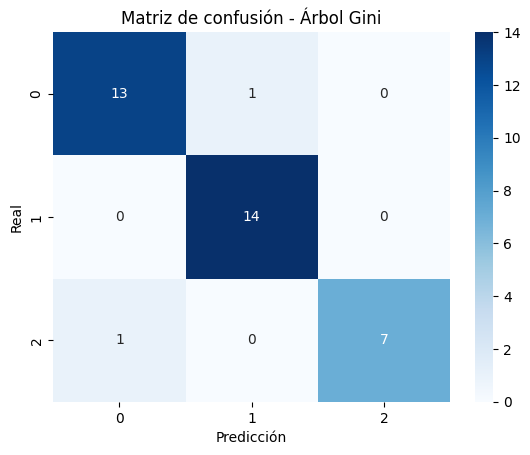

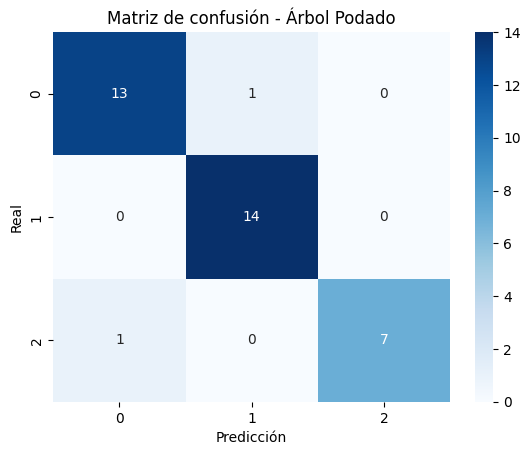

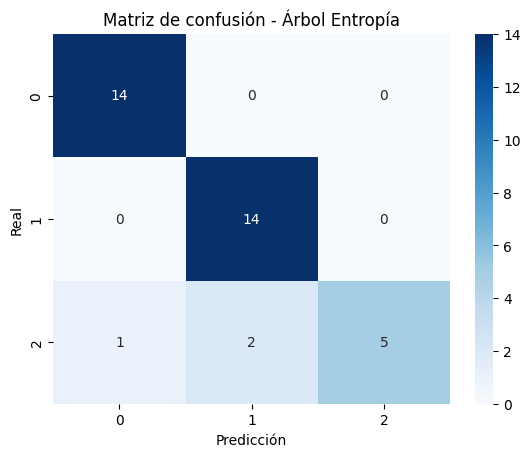

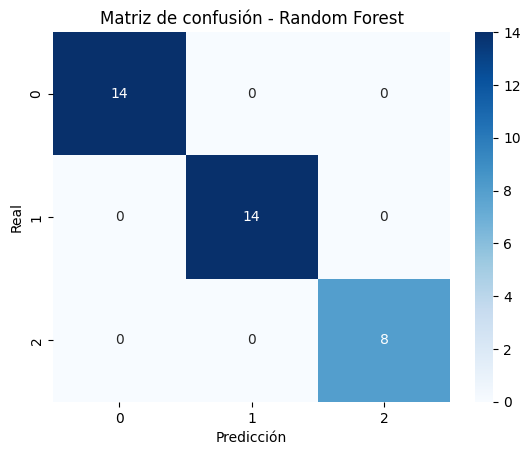

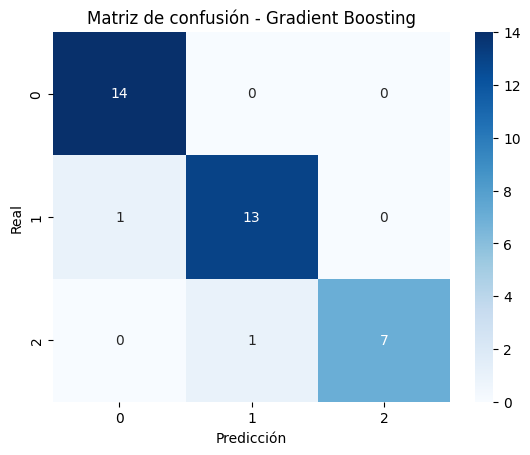

In [23]:
def mostrar_matriz_confusion(y_true, y_pred, titulo):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(titulo)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

mostrar_matriz_confusion(y_test, y_pred_gini, "Matriz de confusión - Árbol Gini")
mostrar_matriz_confusion(y_test, y_pred_podado, "Matriz de confusión - Árbol Podado")
mostrar_matriz_confusion(y_test, y_pred_entropy, "Matriz de confusión - Árbol Entropía")
mostrar_matriz_confusion(y_test, y_pred_rf, "Matriz de confusión - Random Forest")
mostrar_matriz_confusion(y_test, y_pred_gb, "Matriz de confusión - Gradient Boosting")

### Análisis de resultados

### <font color='red'>**Actividad 5:**</font>

**a)** Analizar y **explicar los resultados** (usando una celda de texto), comparando los **valores de accuracy** obtenidos en cada caso.

## -----------Análisis general

### Árbol Gini (0.944)

Tiene un buen equilibrio entre las tres clases (0, 1 y 2). Presenta ligeros errores en la clase 2 (recall = 0.88), lo que indica que confundió algunos vinos de esa clase con otras. Su desempeño es consistente y estable, pero no perfecto.

### Árbol Podado (0.944)

Muestra idéntico comportamiento al árbol Gini, ya que la poda aplicada (ccp_alpha=0.01) fue leve y no cambió las divisiones principales del árbol. Su precisión y métricas son iguales, lo que sugiere que el modelo original no estaba sobreajustado, y la poda no afectó negativamente el rendimiento. Esto es un resultado positivo ya que el modelo mantiene rendimiento con una estructura más simple.

### Árbol Entropía (0.917)

Tiene un rendimiento ligeramente inferior. El recall de la clase 2 baja a 0.62, lo que significa que solo reconoció correctamente el 62% de los vinos de esa clase, confundiendo varios con otras clases.
En general, los criterios Gini y Entropía suelen dar resultados similares, pero en este caso el criterio de Entropía fue menos eficiente en las divisiones del árbol para este dataset.

### Random Forest (1.000)

Logra una precisión perfecta (100%) tanto en entrenamiento como en testeo. Clasifica todas las muestras correctamente en las tres clases. Es el modelo con mejor desmepeño global. Podría estar sobreajustado, aunque habría que confirmarlo con un conjunto de test adicional (tomando el que tenemos como conjunto de validación). 

### Gradient Boosting (0.944)

Su precisión es igual a la del árbol Gini y del árbol podado. Al igual que esos modelos, falla levemente en la clase 2 (recall = 0.88). Aunque el Gradient Boosting normalmente puede superar al Random Forest en datasets más grandes o complejos, en este caso (dataset pequeño y bien separado), el Random Forest logró un ajuste más óptimo.

## -----------Conclusión Final
Los tres modelos basados en árboles individuales (Gini, Podado, Entropía) funcionan bien, pero tienen limitaciones al generalizar, especialmente con clases menos representadas.
Los modelos ensemble (Random Forest y Gradient Boosting) confirman su superioridad, siendo que en datasets pequeños y balanceados, estos aprovacehan mejor la variabilidad de los datos, generando fronteras de decisión más precisas.